#Course_03

Natural Language Processing in Tensorflow

##Week 03:

### Install the correct combination version of tensorflow dataset & tensorflow  

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets==1.3.1

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


###Intorduction to LSTM Layers in the Model :

Lets build a sample model with LSTM Layers :

In [0]:

model = tf.keras.models.Sequential([
              tf.keras.layers.Embedding(input_dim = 1000,output_dim = 64, input_length = 500),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences = True)),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
              tf.keras.layers.Dense(units = 64,activation = 'relu'),
              tf.keras.layers.Dense(units = 2 , activation = 'sigmoid')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 64)           64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 128)          66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 175,554
Trainable params: 175,554
Non-trainable params: 0
_________________________________________________________________


###LSTM Model for the imdb subwords dataset :

Lets now use an LSTM included model on the imdb_subwords dataset ;

In [0]:
#-----------------------------Load the data ------------------------------------

import tensorflow_datasets as tfds 
imdb , info = tfds.load('imdb_reviews/subwords8k' , with_info = True , as_supervised = True )

#----------------- train test split --------------------------------------------

train_data , test_data = imdb['train'] , imdb['test']

# ------------------ tokenizer of tfds -----------------------------------------

tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

#----------------------Check the Encoder ---------------------------------------

sample_string = 'Tensowflow is awesome tool ! '

tokenized_output = tokenizer.encode(sample_string)
print(f'The tokenized output is {tokenized_output}')

original_string = tokenizer.decode(tokenized_output)
print(f'The original String is : {original_string}')

# --------------------- Check the mapping --------------------------------------

for ts in tokenized_output:
  print(f'{ts}--------->{tokenizer.decode([ts])}')


#---------------------- Model with the LSTM Layer ------------------------------

embedding_dim = 64

model = tf.keras.models.Sequential([
                tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size , output_dim = embedding_dim),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                tf.keras.layers.Dense(units = 64, activation = 'relu'),
                tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model_1 = tf.keras.models.Sequential([
                tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size , output_dim = embedding_dim ),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences = True)),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(units = 64, activation = 'relu'),
                tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])


#-----------------------------compile the models -------------------------------

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model_1.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])


#------------------ train the model --------------------------------------------

history =  model.fit(train_data , epochs = 3 , validation_data = test_data)
history_1 =  model_1.fit(train_data , epochs = 3 , validation_data = test_data)

#---------------------Check the results -  -------------------------------------

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

plot_graphs(history_1, "accuracy")
plot_graphs(history_1, "loss")



### Model : 01  IMDB Subwords 8K with Single Layer LSTM 

#### Install the correct combination of tensorflow and tensorflow_datasets

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets==1.3.1

#### Import the Libraries

In [0]:
from __future__ import absolute_import , division , print_function , unicode_literals

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


#### Get the data from the dataset :

In [0]:
# get the data :
data , info = tfds.load('imdb_reviews/subwords8k',with_info = True , as_supervised = True)
train_data , test_data = data['train'],data['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


#### Import the Tokenizer()

In [0]:
# lets get the tokenizer from the info

tokenizer = info.features['text'].encoder

####Prepare the data pipeline with the Shuffle and Batch_padding 

In [0]:
Buffer_Size = 10000
batch_size = 64

train_data = train_data.shuffle(Buffer_Size)
train_data = train_data.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(test_data))

####Now lets build the model : 


In [0]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Embedding(tokenizer.vocab_size,64),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
            tf.keras.layers.Dense(units = 64, activation = 'relu'),
            tf.keras.layers.Dense(1,'sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


####Compile the Model :

In [0]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

####Train the Model : 

In [0]:
NUM_EPOCHS = 2
history = model.fit(train_data , epochs = NUM_EPOCHS , validation_data = test_data)

Epoch 1/2
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 1251s 3s/step - loss: 0.5246 - accuracy: 0.7314 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
391/391 [==============================] - 1037s 3s/step - loss: 0.3777 - accuracy: 0.8457 - val_loss: 0.4587 - val_accuracy: 0.7984


In [0]:
import matplotlib.pyplot as plt 

def plot_graphs(history , string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

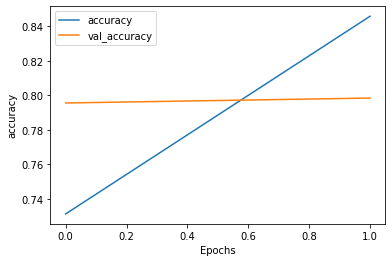

In [0]:
plot_graphs(history,'accuracy')

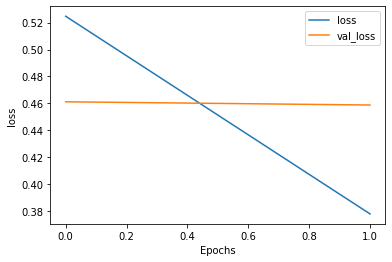

In [0]:
plot_graphs(history,'loss')

### Model 02 : IMDB Subwords 8K with Multilayer LSTM

#### Install the correct combination of tensorflow and tensorflow_datasets

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets= 1.3.1

####Import the Libraries

In [0]:
from __future__ import absolute_import, division, print_function , unicode_literals

In [0]:
import tensorflow as tf 
import tensorflow_datasets as tfds
print(tf.__version__)

####Load the Data 

In [0]:
# Get the data :
data , info = tfds.load('imdb_reviews/subwords8k' , with_info = True , as_supervised = True)
train_data , test_data = data['train'] , data['test']

#### Load the Tokenizer()

In [0]:
# load the tokenizer :
tokenizer = info.features['text'].encoder

#### Prepare the data pipeline with shuffle and batch_padding 

In [0]:
buffer_size = 10000
batch_size = 64

train_data = train_data.shuffle(buffer_size)
train_data = train_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(test_data))

#### Define the Model 

In [0]:
model = tf.keras.models.Sequential([
              tf.keras.layers.Embedding(tokenizer.vocab_size , 64),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64 , return_sequences = True)),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
              tf.keras.layers.Dense(units = 64 , activation  = 'relu'),
              tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


####Compile the Model 

In [0]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

####Train The Model 

In [0]:
num_epochs = 2
model.fit(train_data, epochs = num_epochs , validation_data = test_data)

#### Plot the Loss and Accuracy graphs for the train vs test dataset

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [0]:
plot_graphs(history, 'accuracy')

In [0]:
plot_graphs(history , 'loss')

### Model 03 : IMDB Subwords 8K with 1 D Convolutional Layer

#### install the correct combination of tensorflow and tensorflow datasets

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets= 1.3.1

####Import the libraries

In [0]:
from __future__ import absolute_import, division , print_function , unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

####Load the Data from tensorflow_datasets

In [0]:
# Get the data :
#data , info = tfds.load('imdb_reviews/subwords8k' , with_info = True , as_supervised = True)
train_data , test_data = data['train'] , data['test']

#### Load the Tokenizer from the tensoflow datsets

In [0]:
# load the tokenizer :
tokenizer = info.features['text'].encoder

####Prepare the data-pipeline with shuffle and batch_padding

In [0]:
buffer_size = 10000
batch_size = 64

train_data = train_data.shuffle(buffer_size)
train_data = train_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(test_data))

####Define Model with Convolution 1D

In [0]:
model = tf.keras.models.Sequential([
              tf.keras.layers.Embedding(tokenizer.vocab_size , 64),
              tf.keras.layers.Conv1D(128,5 ,activation = 'relu'),
              tf.keras.layers.GlobalAveragePooling1D(),
              tf.keras.layers.Dense(units = 64 , activation  = 'relu'),
              tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


####Compile the Model

In [0]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

####Train the Model

In [0]:
num_epochs = 2
model.fit(train_data, epochs = num_epochs , validation_data = test_data , verbose = 1)

Epoch 1/2
391/391 [==============================] - 177s 454ms/step - loss: 0.3341 - accuracy: 0.8721 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
391/391 [==============================] - 145s 370ms/step - loss: 0.2126 - accuracy: 0.9197 - val_loss: 0.3028 - val_accuracy: 0.8776


####Plot the Accuracy and Loss graphs for Train Vs Test

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

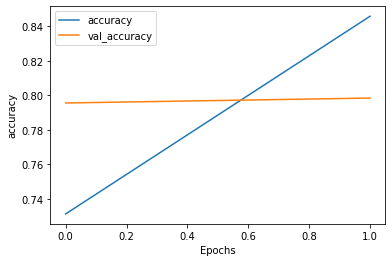

In [0]:
plot_graphs(history, 'accuracy')

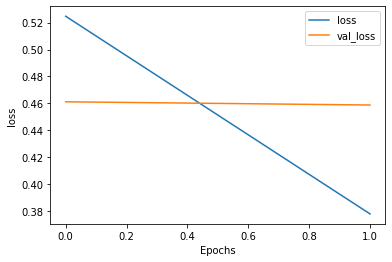

In [0]:
plot_graphs(history , 'loss')

###Model 04 : Sarcasm Dataset with Bidirectional LSTM

#### Insure that tensorflow is updated *italicized text*

In [0]:
!pip install tensorflow==2.0.0-beta0

####Import the libraries :

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

import warnings

2.0.0-beta0


#### Download the data:

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-04-10 13:14:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-04-10 13:14:29 (220 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



####Load the data :

In [0]:
import json

with open('/tmp/sarcasm.json') as f:
  datasets = json.load(f)

sentences = []
labels = []
urls = []

for entries in datasets:
  sentences.append(entries['headline'])
  labels.append(entries['is_sarcastic'])
  urls.append(entries['article_link'])

print("Data size is : ",len(sentences))

Data size is :  26709


#### Divide the data into training and testing datasets :

In [0]:
training_size = 20000

training_sentences  =  sentences[:training_size]
training_labels = labels[:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

print("Training Dataset Size is : ",len(training_sentences))
print("Testing Datset size  is : ",len(testing_sentences))

Training Dataset Size is :  20000
Testing Datset size  is :  6709


#### Now tokenize the data :

In [0]:
#------------------Load the Library----------------------

from tensorflow.keras.preprocessing.text import Tokenizer

#---------------Define the tokenizer instance---------------------
vocab_size = 1000
oov_tok = "<OOV>"


myTokenizer = Tokenizer(  num_words = vocab_size ,
                          split = ' ',
                          filters = '!@#$%^&*()_+[]=-./;?><',
                          char_level = False,
                          oov_token = oov_tok,
                          lower = True)

#------------Fit tokenizer on the train data ----------------------

myTokenizer.fit_on_texts(training_sentences)

word_index = myTokenizer.word_index

#---------------------Tokenize now the train and test data -------------------

training_sequences = myTokenizer.texts_to_sequences(training_sentences)
testing_sequences = myTokenizer.texts_to_sequences(testing_sentences)


#### lets now pad the training and testing sequences

In [0]:

max_length = 120

trunc_type='post'

padding_type='post'

from tensorflow.keras.preprocessing.sequence import pad_sequences

training_padded = pad_sequences( training_sequences,
                                 maxlen = max_length,
                                 padding = padding_type,
                                 truncating = trunc_type,)


testing_padded = pad_sequences( testing_sequences ,
                                maxlen = max_length , 
                                padding =padding_type,
                                truncating = trunc_type)



#### Build The Model Now :

In [0]:

embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 64)                12544     
_________________________________________________________________
dense_14 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model Now :

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Train the Model Now :

In [0]:
import numpy as np 
num_epochs = 10

print(type(training_padded))
print(type(training_labels))  # its a list which needs to be converted into an array numpy array 

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

print(type(training_labels))

history = model.fit(
                    training_padded,
                    training_labels,
                    epochs =  num_epochs,
                    validation_data = (testing_padded , testing_labels),
                    verbose = 1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.4840 - accuracy: 0.7559 - val_loss: 0.3922 - val_accuracy: 0.8190
Epoch 2/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3572 - accuracy: 0.8348 - val_loss: 0.3752 - val_accuracy: 0.8213
Epoch 3/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3334 - accuracy: 0.8498 - val_loss: 0.3718 - val_accuracy: 0.8287
Epoch 4/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3166 - accuracy: 0.8604 - val_loss: 0.3694 - val_accuracy: 0.8322
Epoch 5/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3029 - accuracy: 0.8644 - val_loss: 0.3721 - val_accuracy: 0.8319
Epoch 6/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.2960 - accuracy: 0.8680 - val_loss: 0.3801 - val_ac

#### Lets now plot the graphs on the model performance

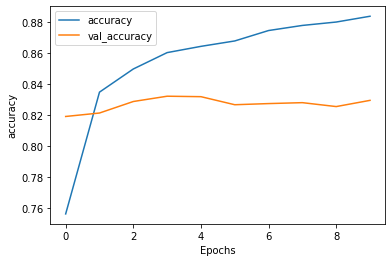

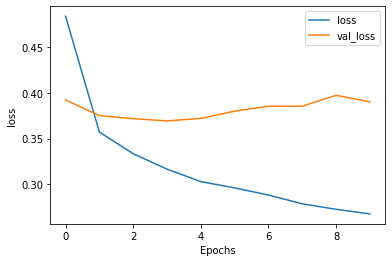

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### Lets save the Model:

In [0]:
model.save("test.h5")

###Model 05 :Sarcasm with 1D Covolutional Layer:

#### Insure that tensorflow is updated 

In [0]:
!pip install tensorflow==2.0.0-beta0

####Import the Libraries:

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

import warnings

2.0.0-beta0


#### Download the data 

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

####Load the Data :

In [0]:
import json

with open('/tmp/sarcasm.json') as f:
  datasets = json.load(f)

sentences = []
labels = []
urls = []

for entries in datasets:
  sentences.append(entries['headline'])
  labels.append(entries['is_sarcastic'])
  urls.append(entries['article_link'])

print("Data size is : ",len(sentences))

####divide the data into training and testing set :

In [0]:
training_size = 20000

training_sentences  =  sentences[:training_size]
training_labels = labels[:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

print("Training Dataset Size is : ",len(training_sentences))
print("Testing Dataset size  is : ",len(testing_sentences))

#### Tokenize the datasets :

In [0]:
#------------------Load the Library----------------------

from tensorflow.keras.preprocessing.text import Tokenizer

#---------------Define the tokenizer instance---------------------
vocab_size = 1000
oov_tok = "<OOV>"


myTokenizer = Tokenizer(  num_words = vocab_size ,
                          split = ' ',
                          filters = '!@#$%^&*()_+[]=-./;?><',
                          char_level = False,
                          oov_token = oov_tok,
                          lower = True)

#------------Fit tokenizer on the train data ----------------------

myTokenizer.fit_on_texts(training_sentences)

word_index = myTokenizer.word_index

#---------------------Tokenize now the train and test data -------------------

training_sequences = myTokenizer.texts_to_sequences(training_sentences)
testing_sequences = myTokenizer.texts_to_sequences(testing_sentences)


####Padding The Data Sequences :

In [0]:

max_length = 120

trunc_type='post'

padding_type='post'

from tensorflow.keras.preprocessing.sequence import pad_sequences

training_padded = pad_sequences( training_sequences,
                                 maxlen = max_length,
                                 padding = padding_type,
                                 truncating = trunc_type,)


testing_padded = pad_sequences( testing_sequences ,
                                maxlen = max_length , 
                                padding =padding_type,
                                truncating = trunc_type)



#### Build the Model :

In [0]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D( 128 , 5 , activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Compile The Model :

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Train The Model :

In [0]:
import numpy as np 
num_epochs = 20

print(type(training_padded))
print(type(training_labels))  # its a list which needs to be converted into an array numpy array 

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

print(type(training_labels))

history = model.fit(
                    training_padded,
                    training_labels,
                    epochs =  num_epochs,
                    validation_data = (testing_padded , testing_labels),
                    verbose = 1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Train on 20000 samples, validate on 6709 samples
Epoch 1/20
20000/20000 [==============================] - 5s 259us/sample - loss: 0.5251 - accuracy: 0.7241 - val_loss: 0.4284 - val_accuracy: 0.8058
Epoch 2/20
20000/20000 [==============================] - 5s 248us/sample - loss: 0.3901 - accuracy: 0.8214 - val_loss: 0.4093 - val_accuracy: 0.8080
Epoch 3/20
20000/20000 [==============================] - 5s 249us/sample - loss: 0.3649 - accuracy: 0.8332 - val_loss: 0.3963 - val_accuracy: 0.8210
Epoch 4/20
20000/20000 [==============================] - 5s 246us/sample - loss: 0.3503 - accuracy: 0.8429 - val_loss: 0.3960 - val_accuracy: 0.8222
Epoch 5/20
20000/20000 [==============================] - 5s 249us/sample - loss: 0.3370 - accuracy: 0.8469 - val_loss: 0.3911 - val_accuracy: 0.8238
Epoch 6/20
20000/20000 [==============================] - 5s 248us/sample - loss: 0.3248 - accuracy: 0.8526 - val_loss: 0.3930 - 

#### Lets now plot the model performances

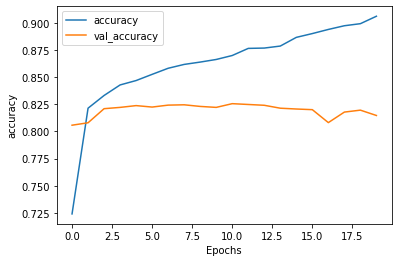

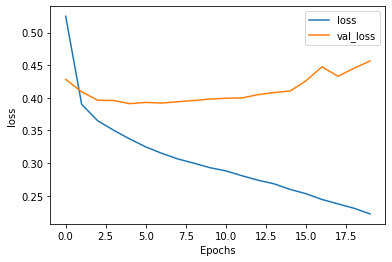

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### Save the Model for Future Use 

In [0]:
model.save('test.h5')

###Model 06 : IMDB Reviews with GRU (and optional LSTM and Conv1D)

#### Ensure that the tensorflow and tensorflow_datasets are having updated versions 

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets=1.3.1

#### Load the library functions

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.0.0-beta0


####Load the data :

In [0]:
imdb , info = tfds.load('imdb_reviews' , as_supervised = True , with_info = True)

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


#### Divide the data into train and test Sequences :

In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']
print(type(train_data))
print(train_data)

<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int64)>


#### Convert the data into the tokenizer feeding format :

In [0]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
print(type(training_sentences))
print(type(training_labels))

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

print(type(training_sentences))
print(type(training_labels))

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


#### Lets Tokenize the dataset :

In [0]:

#------------------Load The Library ----------------------------
from tensorflow.keras.preprocessing.text import Tokenizer

#----------------define the parameters for tokenizer--------------
vocab_size = 10000
oov_tok = "<OOV>"
embedding_dim = 16

#------------ define the tokenizer object ---------------

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# ----------fit it on the training sentences-------------------

tokenizer.fit_on_texts(training_sentences)

#-----Check on the words learned ----------------------------

word_index = tokenizer.word_index


# ------ Convert to token the training and Testing Data ------

training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)


#### Now lets pad the tokenized inputs :

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 120
padding_type = 'post'
trunc_type = 'post'



training_padded = pad_sequences(training_sequences,
                                maxlen = max_length, 
                                truncating = trunc_type,
                                padding = padding_type)


testing_padded = pad_sequences(
                               testing_sequences,
                               maxlen = max_length,
                               truncating = trunc_type,
                               padding = padding_type)


#### lets Analize how does this Tokenizing working :

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(training_padded[1]))
print(training_sentences[1])

the 'roseanne' revival catches up to our <OOV> political mood for better and worse ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
the 'roseanne' revival catches up to our thorny political mood, for better and worse


#### Define and Compile the Model :

In [0]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 64)                9600      
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


#### Lets Now Train the Model :

In [0]:
num_epochs = 3

history = model.fit(
                    training_padded, 
                    training_labels_final, 
                    epochs = num_epochs, 
                    validation_data = (testing_padded, testing_labels_final) )

Train on 20000 samples, validate on 6709 samples
Epoch 1/3
20000/20000 [==============================] - 64s 3ms/sample - loss: 0.0635 - accuracy: 0.9780 - val_loss: 0.5702 - val_accuracy: 0.8454
Epoch 2/3
20000/20000 [==============================] - 63s 3ms/sample - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.7915 - val_accuracy: 0.8351
Epoch 3/3
20000/20000 [==============================] - 64s 3ms/sample - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.8609 - val_accuracy: 0.8332


####Lets plot the Model Performance:

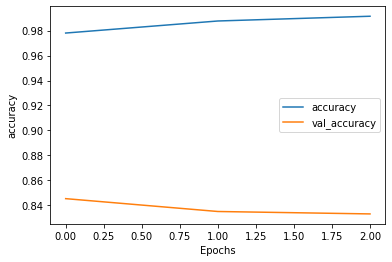

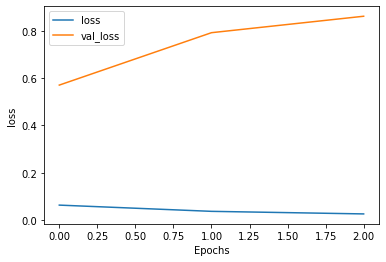

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

####Lets define a model with LSTM :

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 64)                12544     
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 6709 samples
Epoch 1/3
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.4238 - accuracy: 0.7888 - val_loss: 0.3355 - val_accuracy: 0.8527
Epoch 2/3
20000/20000 [=========================

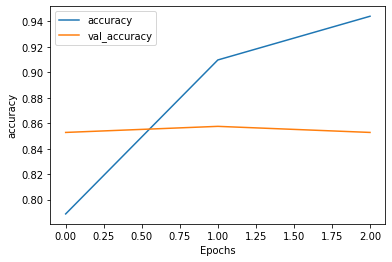

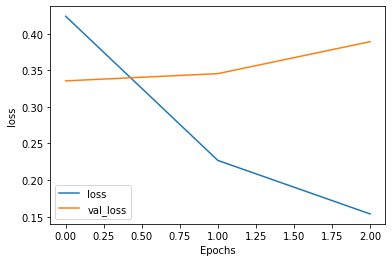

In [0]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

num_epochs = 3

history = model.fit(
                    training_padded, 
                    training_labels_final, 
                    epochs = num_epochs, 
                    validation_data = (testing_padded, testing_labels_final) )


import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

####Model with Conv1D :

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 6709 samples
Epoch 1/3
20000/20000 [==============================] - 6s 294u

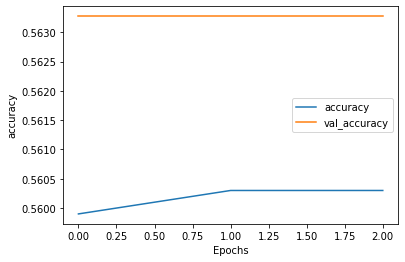

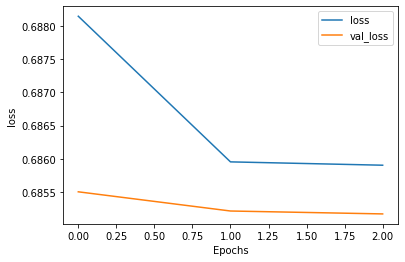

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

num_epochs = 3

history = model.fit(
                    training_padded, 
                    training_labels_final, 
                    epochs = num_epochs, 
                    validation_data = (testing_padded, testing_labels_final) )


import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


###Exercise 3 : Exploring overfitting in NLP

When looking at a number of different types of layer for text classification this week you saw many examples of overfitting -- with one of the major reasons for the overfitting being that your training dataset was quite small, and with a small number of words. Embeddings derived from this may be over generalized also. So for this week’s exercise you’re going to train on a large dataset, as well as using transfer learning of an existing set of embeddings.

The dataset is from:  https://www.kaggle.com/kazanova/sentiment140. I’ve cleaned it up a little, in particular to make the file encoding work with Python CSV reader.

The embeddings that you will transfer learn from are called the GloVe, also known as Global Vectors for Word Representation, available at: https://nlp.stanford.edu/projects/glove/

This course uses a third-party tool, Exercise 3- Exploring overfitting in NLP, to enhance your learning experience. No personal information will be shared with the tool.

In [0]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size= 180000 #Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion = .1

corpus = []


In [0]:
# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

num_sentences = 0

with open("/tmp/training_cleaned.csv") as csvfile:
    
    reader = csv.reader(csvfile, delimiter=',')
    
    for row in reader:
      list_item = []
      list_item.append(row[5])
      
      if row[0] == '0':
        list_item.append(0)
      else:
        list_item.append(1)

      # Your Code here. Create list items where the first item is the text, found in row[5], and the second is the label. Note that the label is a '0' or a '4' in the text. When it's the former, make
      # your label to be 0, otherwise 1. Keep a count of the number of sentences in num_sentences
      # YOUR CODE HERE
      num_sentences = num_sentences + 1
      corpus.append(list_item)


In [0]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


Shuffling the items of a List :

random.shuffle(corpus)

In [0]:
sentences = []
labels = []

random.shuffle(corpus)

for x in range(training_size):
    sentences.append(corpus[x][0])# YOUR CODE HERE)
    labels.append(corpus[x][1])# YOUR CODE HERE)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)# YOUR CODE HERE)

word_index = tokenizer.word_index
vocab_size = len(word_index)# YOUR CODE HERE)

sequences = tokenizer.texts_to_sequences(sentences)# YOUR CODE HERE)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)# YOUR CODE HERE)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [0]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

151198
1


In [0]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt

embeddings_index = {};

with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size + 1, embedding_dim));

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-04-10 16:02:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  74.6MB/s    in 4.4s    

2020-04-10 16:02:25 (74.6 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [0]:
print(len(embeddings_matrix))
# Expected Output
# 138859

151199


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding( vocab_size+1, embedding_dim, input_length = max_length, weights = [embeddings_matrix], trainable=False),
    # YOUR CODE HERE - experiment with combining different types, such as convolutions and LSTMs
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])# YOUR CODE HERE)
model.summary()

num_epochs = 50
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)

print("Training Complete")


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 16, 100)           15119900  
_________________________________________________________________
dropout (Dropout)            (None, 16, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 15,185,053
Trainable params: 65,153
Non-trainable params: 15,119,900
____________________________________

<Figure size 432x288 with 0 Axes>

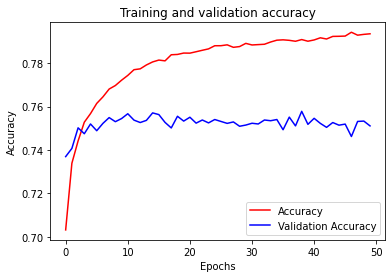

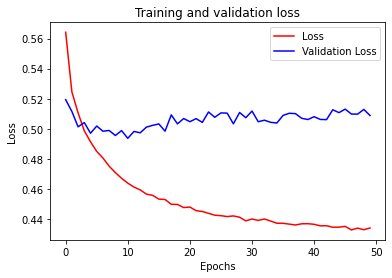

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!